In [34]:
import numpy as np 
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_reg
from util.plotting import *

In [35]:
### #ntwk_list = ['Caltech36', 'UCLA26', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
ntwk_list = ['bn-mouse_retina_1', 'bn-mouse-kasthuri_graph_v4']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

In [36]:
sample_size_1, sample_size_2 = 500, 500
W, beta, H = sndl_equalEdge(graph_list, sample_size_1=sample_size_1,sample_size_2 = sample_size_2, k=10, xi=2, n_components=16, iter = 250)

This is the second sample_size: 500
num of subgraphs induced on k-paths: 500
num of subgraphs induced on k-paths: 500
22802.0
9628.0
initial loading beta [[ 0.92001213 -0.1292406  -0.18549119 -0.34008768 -0.77830901  0.86870227
  -0.91924087 -0.28983    -0.35377615  0.12287815 -0.61419503 -0.50806485
   0.02992201  0.94148184  0.15399416  0.87207531  0.2430432 ]]


  0%|          | 0/250 [00:00<?, ?it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.843), np.float64(1.0)]
--- Iteration 0: Training loss --- [Data, Label, Total] = [17253.079719.3, 37.743759.3, 34543.903197.3]
--- Training --- [threshold, AUC] =  [np.float64(0.717), np.float64(1.0)]
--- Iteration 10: Training loss --- [Data, Label, Total] = [7126.728674.3, 31.781289.3, 14285.238637.3]
!!! pred_type filter


  4%|▍         | 10/250 [00:00<00:10, 23.16it/s]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.717), np.float64(1.0), np.float64(0.997), np.float64(0.997)]
!!! --- Validation (Stopped) --- [threshold, ACC] =  [np.float64(0.717), np.float64(0.997)]
!!! pred_type filter


In [37]:
print(f"This is W's shape: {W.shape}")
print(f"This is beta's shape: {beta.shape}")
print(f"This is H's shape: {H.shape}")


This is W's shape: (100, 16)
This is beta's shape: (1, 17)
This is H's shape: (16, 1000)


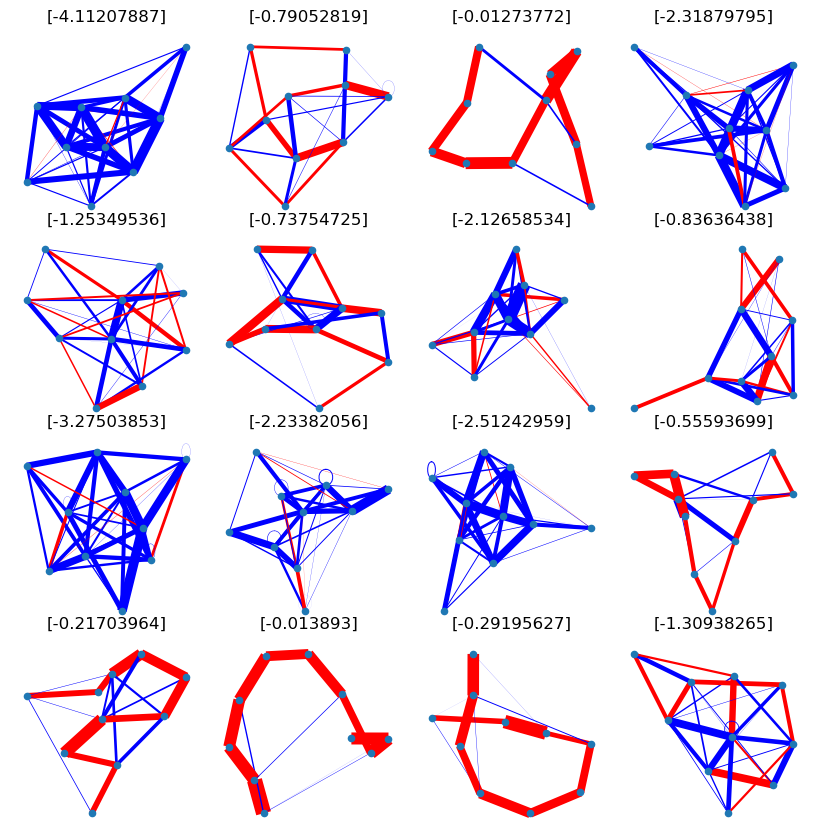

In [38]:
## Visualize dictionaries
display_dict_and_graph(save_path=f'output/figure/Cal_UCLA_{sample_size_1}_{sample_size_2}', W=W, regression_coeff=beta.T, fig_size=[10,10], plot_graph_only=True)

In [30]:
b = beta[0, :]
importance = b
idx = np.argsort(importance)
idx = np.flip(idx)

print(b[idx])


[ 9.15380942  0.013614   -0.02642838 -0.04769408 -0.18625007 -0.45213622
 -0.52835814 -0.60290218 -0.88032218 -1.37263856 -1.57008087 -1.66593667
 -2.43318946 -2.87833164 -3.19338809 -3.49589896 -4.3880567 ]


In [33]:
### Harvard1, MIT8, Caltech36, UCLA26, 'bn-mouse_retina_1', 'bn-mouse-kasthuri_graph_v4'
path = "data/" + "bn-mouse-kasthuri_graph_v4" + '.txt'
G3 = nn.NNetwork()
G3.load_add_edges(path, increment_weights=False, use_genfromtxt=True)

prob = sndl_reg(G3, W, beta, 1000)

print(prob)

[0.40223067]
